# Instalando as Bibliotecas

In [79]:
!pip install pandas

# Importando as Bibliotecas

In [80]:
import pandas as pd
import numpy as np
import os
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Carregando Dataset

In [81]:
# Carregando os dados do arquivo CSV e transformando em um DataFrame
df = pd.read_csv("dataset_tratado.csv")
print("Dimensões do dataset:", df.shape)
print("Colunas:", df.columns)

Dimensões do dataset: (500, 13)
Colunas: Index(['id', 'timestamp', 'temperatura', 'vibracao', 'corrente', 'velocidade',
       'posicao', 'pressao', 'nivel', 'qualidade_ar', 'umidade', 'tensao',
       'fumaca'],
      dtype='object')


In [82]:
# Função que irá apresentar as 5 primeiras linhas (por padrão), podendo ser alterada para mais linhas.
df.head()

,id,timestamp,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
0,1,2025-06-07T18:22:00.542865Z,25.3,0.0,1.5,120,45,101.3,75,80,60.0,220.0,0
1,2,2025-06-08T00:51:20.487094Z,38.1,4.5,7.0,1068,1,7.0,3,410,42.5,224.0,0
2,3,2025-06-08T00:51:32.000514Z,35.5,0.9,6.1,1165,0,7.8,18,304,37.7,213.2,0
3,4,2025-06-08T00:53:20.913343Z,35.0,2.8,3.2,1219,1,7.4,24,386,46.2,222.7,0
4,5,2025-06-08T00:53:41.701267Z,38.3,4.0,4.4,1443,0,4.6,98,202,45.3,212.7,0


In [83]:
# Apresenta qual tipo de dado por variável
df.dtypes

id                int64
timestamp        object
temperatura     float64
vibracao        float64
corrente        float64
velocidade        int64
posicao           int64
pressao         float64
nivel             int64
qualidade_ar      int64
umidade         float64
tensao          float64
fumaca            int64
dtype: object

In [84]:
# Realizando a análise descritiva separada por cada 'label' numéricas
descricao_completa = df.describe()
# Exibindo o resultadO PARA FAZER ANALISE REFERENTE AOS OUTROS TIPOS DE colunas e só escolher 
#print("============================ Análise Descritiva Completa =============================")
display(descricao_completa)

,id,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
count,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,40.70000,37.03080,2.445200,5.236000,1203.772000,3.316000,10.274800,45.03000,338.550000,44.950400,220.583800,0.406000
std,22.53223,1.79938,1.360345,1.477847,188.223016,3.946555,8.430019,27.78736,80.375468,8.619511,5.768444,0.491576
min,1.00000,25.30000,0.000000,1.500000,120.000000,0.000000,4.100000,2.00000,80.000000,30.100000,210.100000,0.000000
25%,24.00000,35.90000,1.400000,4.200000,1075.750000,0.000000,4.100000,23.00000,279.000000,37.975000,215.875000,0.000000
50%,40.00000,37.10000,2.400000,5.200000,1206.000000,2.000000,7.400000,43.00000,340.500000,44.900000,220.800000,0.000000
75%,57.00000,38.40000,3.600000,6.300000,1352.250000,5.000000,13.800000,65.25000,397.000000,51.825000,225.200000,1.000000
max,83.00000,39.90000,4.900000,7.800000,1499.000000,45.000000,101.300000,98.00000,480.000000,60.000000,229.700000,1.000000


# Modelo Preditivo para Monitoramento de Máquinas

## Configuração e Preparação dos Dados (Features e Target)

In [85]:
## ================ Definição das Features (Entradas do Modelo X) ================
features_ml = ['temperatura', 'vibracao', 'corrente', 'pressao', 'umidade', 
               'tensao', 'nivel', 'velocidade', 'posicao', 'qualidade_ar', 'fumaca'] 

# Simulação do DataFrame com as features definidas
np.random.seed(42)
num_samples = 1000
df = pd.DataFrame({
    'id_leitura_sensor': range(1, num_samples + 1),
    'temperatura': np.random.normal(30, 5, num_samples),
    'vibracao': np.random.normal(2, 1.5, num_samples),
    'corrente': np.random.normal(5, 2, num_samples),
    'pressao': np.random.normal(100, 5, num_samples),
    'umidade': np.random.normal(50, 10, num_samples),
    'tensao': np.random.normal(220, 5, num_samples),
    'nivel': np.random.randint(20, 100, num_samples),
    'velocidade': np.random.randint(1000, 1500, num_samples),
    'posicao': np.random.randint(0, 10, num_samples),
    'qualidade_ar': np.random.randint(50, 500, num_samples),
    'fumaca': np.random.choice([0, 1], num_samples, p=[0.99, 0.01])
})

In [86]:
# ================ Criação da Variável Target (status_maquina) ================

# 0 = NORMAL, 1 = ANOMALIA/FALHA (simulando OCORRENCIAS/Limites)
vibracao_max = 6.0
corrente_max = 8.0
temperatura_max = 40.0

# Lógica de Falha: Rotula 1 se exceder o limite (Alto Risco)
high_risk = (df['vibracao'] > vibracao_max) | \
            (df['corrente'] > corrente_max) | \
            (df['temperatura'] > temperatura_max)
            
# Amostras de alto risco têm 25% de chance de serem rotuladas como FALHA (1)
df['status_maquina'] = np.where(high_risk, 
                                 np.random.choice([0, 1], len(df), p=[0.75, 0.25]),
                                 0)

# 1.3 Separando Features (X) e Target (y)
X = df[features_ml] 
y_encoded = df['status_maquina'] 

print("============================ Dados Carregados ============================")
print(f"Features de entrada (X): {list(X.columns)}")
print("==========================================================================")

============================ Dados Carregados ============================
Features de entrada (X): ['temperatura', 'vibracao', 'corrente', 'pressao', 'umidade', 'tensao', 'nivel', 'velocidade', 'posicao', 'qualidade_ar', 'fumaca']


## Análise Exploratória e Pré-Processamento

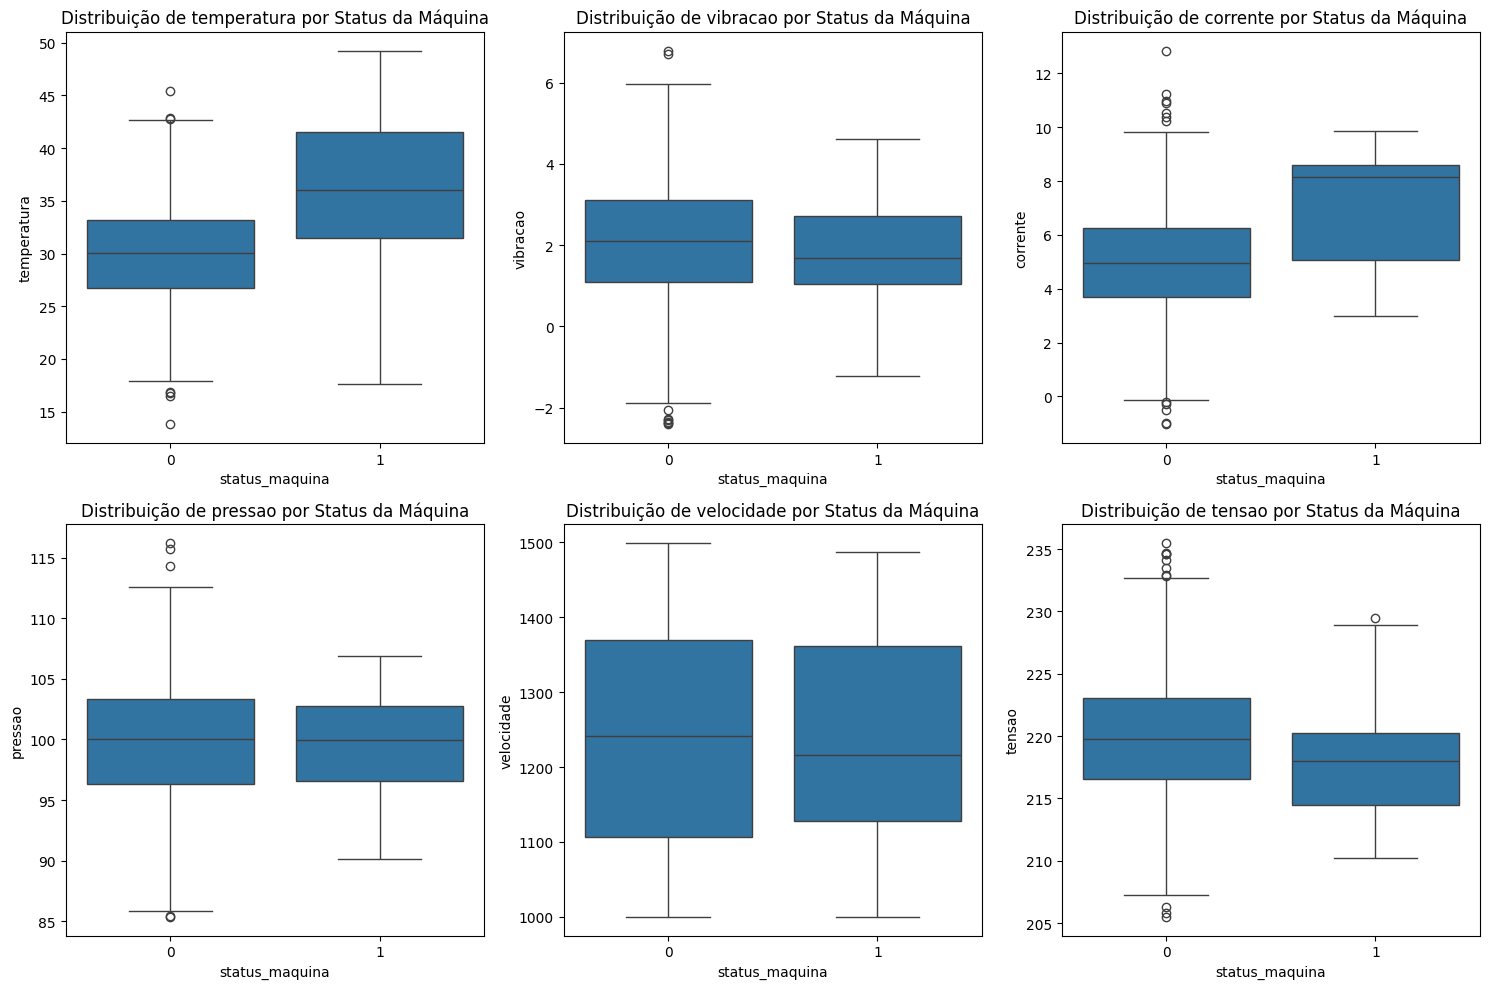

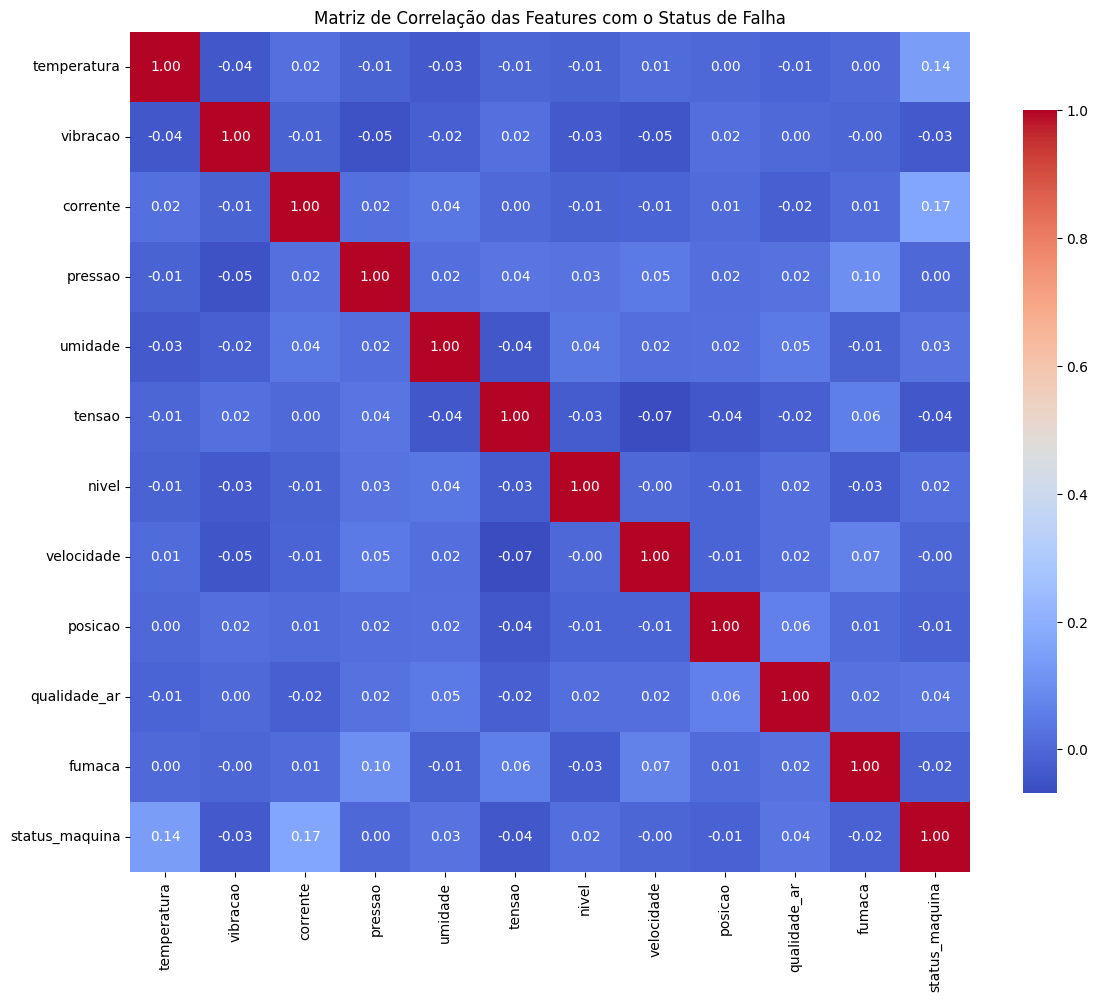


**Interpretação da Matriz de Correlação:**
O valor na linha de 'status_maquina' mostra o quanto cada sensor está relacionado à falha. Valores próximos a 1 (positivo) ou -1 (negativo) indicam forte relação.


In [103]:
# ================ Análise Exploratória de Dados (EDA) ================

# Distribuição das features críticas por categoria de Falha (Box Plot)
critical_features = ['temperatura', 'vibracao', 'corrente', 'pressao', 'velocidade', 'tensao'] 
plt.figure(figsize=(15, 10))
for i, feature in enumerate(critical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='status_maquina', y=feature, data=df)
    plt.title(f'Distribuição de {feature} por Status da Máquina')
plt.tight_layout()
plt.show()

# ================ Matriz de Correlação ================

# Selecionada as colunas de interesse (Features + Target) e exclui o ID
colunas_corr = features_ml + ['status_maquina']
df_correlacao = df[colunas_corr] 

# Calculo da matriz de correlação
correlacao = df_correlacao.corr()

# Exibição da matriz como um heatmap
plt.figure(figsize=(12, 10))
plt.title("Matriz de Correlação das Features com o Status de Falha")
plt.tight_layout()
plt.show()

print("\n**Interpretação da Matriz de Correlação:**")
print("O valor na linha de 'status_maquina' mostra o quanto cada sensor está relacionado à falha. Valores próximos a 1 (positivo) ou -1 (negativo) indicam forte relação.")


In [ ]:
# ================ Divisão e Escalonamento dos Dados (Mantido) ================

# Dividindo os dados (usando stratify para manter a proporção de falhas)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Escalonamento (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [88]:
# ================ Divisão e Escalonamento dos Dados ================

# Dados divididos (usando stratify para manter a proporção de falhas)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("\n============================ Informações de Treinamento ============================")
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Proporção de ANOMALIA no Treino: {y_train.sum() / len(y_train) * 100:.2f}%")

# Escalonamento (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Aprende a escala SOMENTE nos dados de treino
X_test_scaled = scaler.transform(X_test)  # Aplica a escala aprendida nos dados de teste


============================ Informações de Treinamento ============================
Tamanho do conjunto de treino: 800 amostras
Proporção de ANOMALIA no Treino: 2.25%


## Treinamento e Avaliação do Modelo (KNN)

In [89]:
# ================ Treinamento do Modelo ================

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

# ================ Análise de Importância das Features ================

importances = model_rf.feature_importances_
feature_names = X_train.columns # X_train deve ter sido definido no passo 1.3
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\n============================ Importância dos Sensores (Random Forest) ============================")
print(df_importances)

# ================ Avaliação do Modelo ================

y_pred = model_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\n============================ Avaliação do Modelo Treinado: Random Forest ============================")
print(f"Acurácia Geral do modelo: {accuracy:.4f}")

# Foco no Recall para ANOMALIA (1)
print("\n============================ Relatório de Classificação: ============================")
print(classification_report(y_test, y_pred, target_names=['NORMAL (0)', 'ANOMALIA (1)']))



============================ Importância dos Sensores (Random Forest) ============================
         Feature  Importance
2       corrente    0.339738
0    temperatura    0.211219
4        umidade    0.076222
9   qualidade_ar    0.072050
1       vibracao    0.063060
7     velocidade    0.058047
3        pressao    0.054298
5         tensao    0.051702
6          nivel    0.043216
8        posicao    0.030379
10        fumaca    0.000069

============================ Avaliação do Modelo Treinado: Random Forest ============================
Acurácia Geral do modelo: 0.9800

============================ Relatório de Classificação: ============================
              precision    recall  f1-score   support

  NORMAL (0)       0.98      1.00      0.99       196
ANOMALIA (1)       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



C:\Users\Beatriz\anaconda3\envs\Farm_Tech_Solution\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Beatriz\anaconda3\envs\Farm_Tech_Solution\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Beatriz\anaconda3\envs\Farm_Tech_Solution\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

## Treinamento de Múltiplos Modelos

In [90]:
# ================ Logistic Regression ================
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train_scaled, y_train)

# ================ Decision Tree ================
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

# ================ Random Forest (Melhor para falhas raras: usa class_weight='balanced') ================
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

# ================ KNN ================
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# ================ SVM (Pode ser lento, mas é robusto) ================
model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_train_scaled, y_train)

print("✅ Todos os modelos foram treinados com sucesso.")

✅ Todos os modelos foram treinados com sucesso.


## Comparação de Métricas e Visualização

In [100]:
# ================ ================Dicionário de Modelos e Previsões
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "KNN": model_knn,
    "SVM": model_svm
}
resultados = []

## Comparação de Desempenho dos Modelos


📊 Modelo: Logistic Regression
🎯 Acurácia: 0.9750
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Logistic Regression:


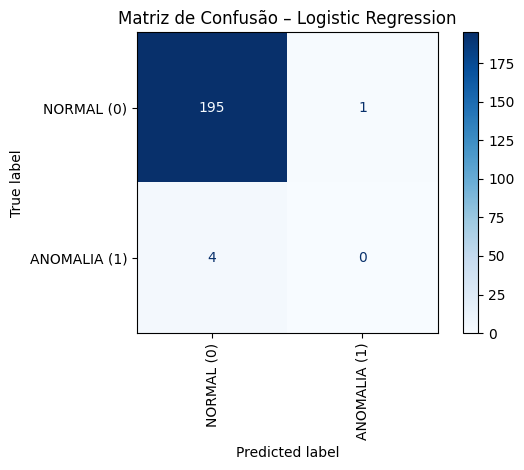


📊 Modelo: Decision Tree
🎯 Acurácia: 0.9400
🚨 RECALL (ANOMALIA): 0.2500 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Decision Tree:


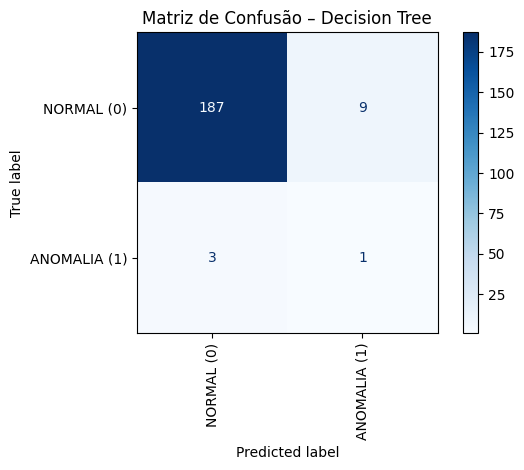


📊 Modelo: Random Forest
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Random Forest:


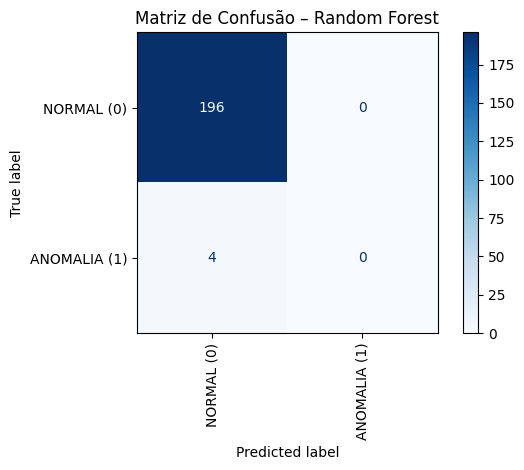


📊 Modelo: KNN
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – KNN:


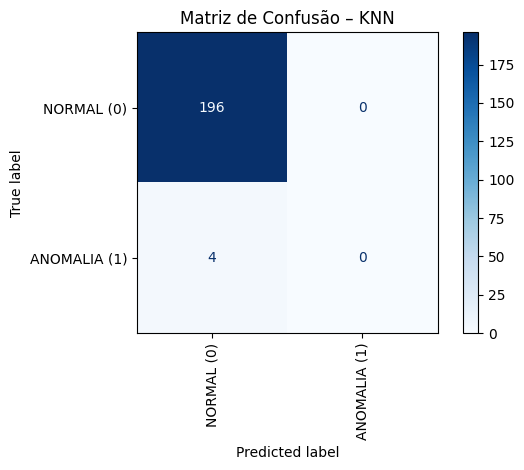


📊 Modelo: SVM
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – SVM:


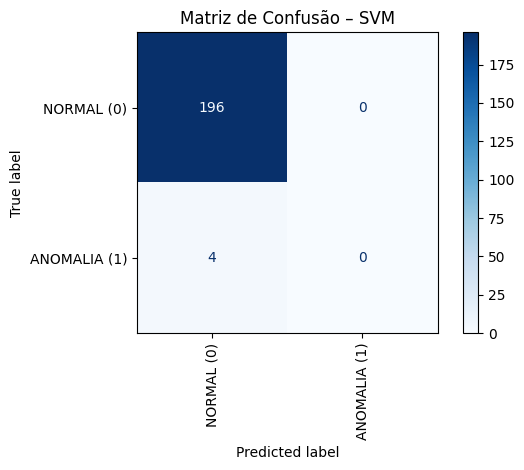

In [99]:
for name, model in models.items():
    # Fazendo a previsão no conjunto de teste para o modelo atual
    preds = model.predict(X_test_scaled) 

    # Calculando as métricas. Foco no 'weighted' para comparação geral.
    acc = accuracy_score(y_test, preds)
    # Para Manutenção Preditiva, vamos focar no RECALL da classe ANOMALIA (1)
    recall_anomalia = recall_score(y_test, preds, pos_label=1, zero_division=0)
    
    # Métricas ponderadas (weighted) para uma visão geral
    prec_weighted = precision_score(y_test, preds, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, preds, average='weighted', zero_division=0)

    resultados.append({
        "Modelo": name,
        "Accuracy": acc,
        "Recall (Anomalia)": recall_anomalia, # Métrica Chave!
        "F1-Score (Weighted)": f1_weighted
    })

    print(f"\n📊 Modelo: {name}")
    print(f"🎯 Acurácia: {acc:.4f}")
    print(f"🚨 RECALL (ANOMALIA): {recall_anomalia:.4f} (QUANTO MAIOR, MELHOR)")

    print(f"🧩 Matriz de Confusão – {name}:")
    
    # Exibir Matriz de Confusão
    disp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, preds),
        display_labels=['NORMAL (0)', 'ANOMALIA (1)']
    )
    disp.plot(cmap="Blues", xticks_rotation='vertical')
    plt.title(f"Matriz de Confusão – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [93]:
# ================ Conclusão e Escolha do Melhor Modelo ================
df_resultados = pd.DataFrame(resultados).sort_values(by="Recall (Anomalia)", ascending=False)
melhor_modelo_nome = df_resultados.iloc[0]["Modelo"]

print("\n================== Comparativo Final ==================")
print(df_resultados.reset_index(drop=True))
print(f"\n🏆 O melhor modelo com base no **Recall da ANOMALIA** é: **{melhor_modelo_nome}**")

# Salvar o modelo escolhido
melhor_modelo = models[melhor_modelo_nome]
diretorio_models = "models_preditivo"

# Salvar o melhor modelo para uso futuro
joblib.dump(melhor_modelo, os.path.join(diretorio_models, f"modelo_falha_{melhor_modelo_nome.replace(' ', '_').lower()}.pkl"))
print(f"✅ O modelo '{melhor_modelo_nome}' foi salvo para produção.")


================== Comparativo Final ==================
                Modelo  Accuracy  Recall (Anomalia)  F1-Score (Weighted)
0        Decision Tree     0.940               0.25             0.952391
1  Logistic Regression     0.975               0.00             0.967595
2        Random Forest     0.980               0.00             0.970101
3                  KNN     0.980               0.00             0.970101
4                  SVM     0.980               0.00             0.970101

🏆 O melhor modelo com base no **Recall da ANOMALIA** é: **Decision Tree**
✅ O modelo 'Decision Tree' foi salvo para produção.


## Comparação de Métricas e Visualização


================== Comparação de Desempenho dos Modelos ==================

📊 Modelo: Logistic Regression
🎯 Acurácia: 0.9750
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Logistic Regression:


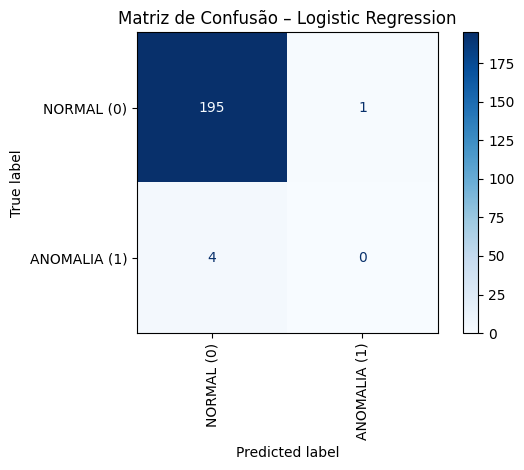


📊 Modelo: Decision Tree
🎯 Acurácia: 0.9400
🚨 RECALL (ANOMALIA): 0.2500 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Decision Tree:


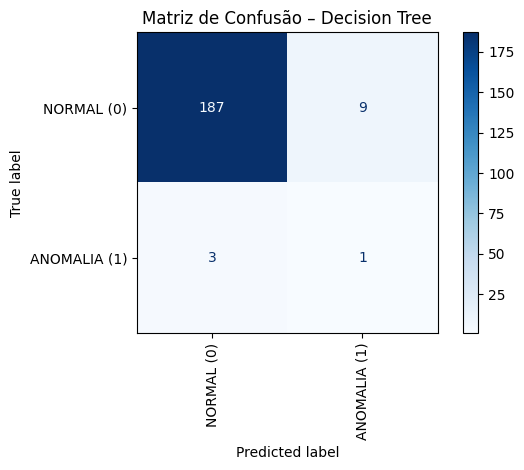


📊 Modelo: Random Forest
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – Random Forest:


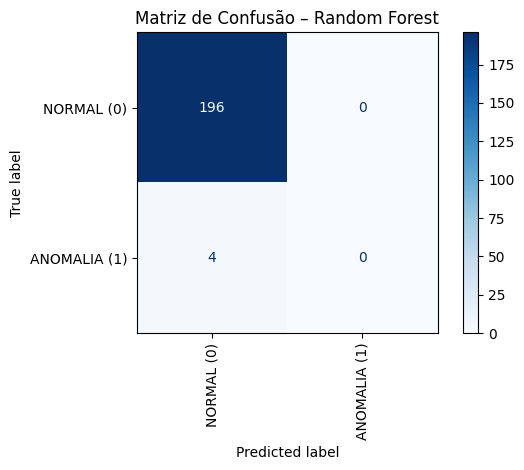


📊 Modelo: KNN
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – KNN:


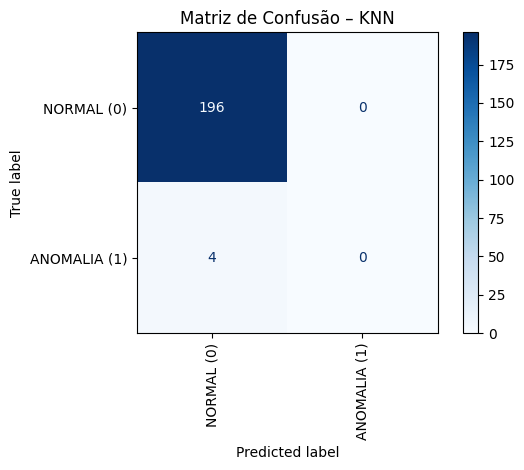


📊 Modelo: SVM
🎯 Acurácia: 0.9800
🚨 RECALL (ANOMALIA): 0.0000 (QUANTO MAIOR, MELHOR)
🧩 Matriz de Confusão – SVM:


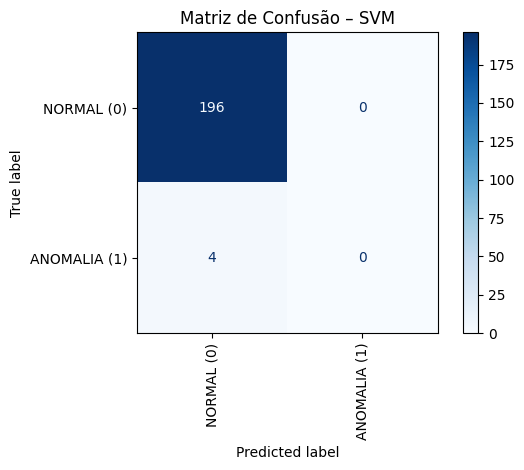

In [94]:
# ================ Dicionário de Modelos e Previsões ================
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "KNN": model_knn,
    "SVM": model_svm
}

resultados = []
print("\n================== Comparação de Desempenho dos Modelos ==================")

for name, model in models.items():
    # Fazendo a previsão no conjunto de teste para o modelo atual
    preds = model.predict(X_test_scaled) 

    # Calculando as métricas. Foco no 'weighted' para comparação geral.
    acc = accuracy_score(y_test, preds)
    # Para Manutenção Preditiva, vamos focar no RECALL da classe ANOMALIA (1)
    recall_anomalia = recall_score(y_test, preds, pos_label=1, zero_division=0)
    
    # Métricas ponderadas (weighted) para uma visão geral
    prec_weighted = precision_score(y_test, preds, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, preds, average='weighted', zero_division=0)

    resultados.append({
        "Modelo": name,
        "Accuracy": acc,
        "Recall (Anomalia)": recall_anomalia, # Métrica Chave!
        "F1-Score (Weighted)": f1_weighted
    })

    print(f"\n📊 Modelo: {name}")
    print(f"🎯 Acurácia: {acc:.4f}")
    print(f"🚨 RECALL (ANOMALIA): {recall_anomalia:.4f} (QUANTO MAIOR, MELHOR)")

    print(f"🧩 Matriz de Confusão – {name}:")
    
    # Exibir Matriz de Confusão
    # Você precisará da função ConfusionMatrixDisplay, que deve ser importada
    disp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, preds),
        display_labels=['NORMAL (0)', 'ANOMALIA (1)']
    )
    disp.plot(cmap="Blues", xticks_rotation='vertical')
    plt.title(f"Matriz de Confusão – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [95]:
# ================ Conclusão e Escolha do Melhor Modelo ================
df_resultados = pd.DataFrame(resultados).sort_values(by="Recall (Anomalia)", ascending=False)
melhor_modelo_nome = df_resultados.iloc[0]["Modelo"]

print("\n================== Comparativo Final ==================")
print(df_resultados.reset_index(drop=True))
print(f"\n🏆 O melhor modelo com base no **Recall da ANOMALIA** é: **{melhor_modelo_nome}**")

# Salvar o modelo escolhido
melhor_modelo = models[melhor_modelo_nome]
diretorio_models = "models_preditivo"

# Salvar o melhor modelo para uso futuro
joblib.dump(melhor_modelo, os.path.join(diretorio_models, f"modelo_falha_{melhor_modelo_nome.replace(' ', '_').lower()}.pkl"))
print(f"✅ O modelo '{melhor_modelo_nome}' foi salvo para produção.")


================== Comparativo Final ==================
                Modelo  Accuracy  Recall (Anomalia)  F1-Score (Weighted)
0        Decision Tree     0.940               0.25             0.952391
1  Logistic Regression     0.975               0.00             0.967595
2        Random Forest     0.980               0.00             0.970101
3                  KNN     0.980               0.00             0.970101
4                  SVM     0.980               0.00             0.970101

🏆 O melhor modelo com base no **Recall da ANOMALIA** é: **Decision Tree**
✅ O modelo 'Decision Tree' foi salvo para produção.


## Salvamento e Previsão em Produção (Alerta)

In [96]:
# ================ Salvando o Modelo e o Scaler ================

diretorio_models = "models_preditivo"
os.makedirs(diretorio_models, exist_ok=True)
joblib.dump(model, os.path.join(diretorio_models, "modelo_falha_knn.pkl"))
joblib.dump(scaler, os.path.join(diretorio_models, "scaler_falha.pkl"))
print(f"\n✅ Modelo e scaler salvos para produção em '{diretorio_models}/'")

# ================ Simulação de Nova Leitura (Dados frescos da LEITURAS_SENSORES) ================

nova_leitura_bd = pd.DataFrame([[42.5, 7.1, 9.5, 108.0, 35.0, 230.5, 50, 1400, 5, 400, 0]], columns=features_ml)

# ================ Escalonar a nova leitura usando o scaler TREINADO ================
nova_leitura_scaled = scaler.transform(nova_leitura_bd)

# ================ Previsão de probabilidade ================
probabilidades = model.predict_proba(nova_leitura_scaled)[0]
prob_anomalia = probabilidades[1]
previsao_num = np.argmax(probabilidades)

alerta_status = 'ANOMALIA (FALHA PREVISTA)' if previsao_num == 1 else 'NORMAL'


# ================ Lógica de Disparo de Alerta (Recomendação de Inserção na OCORRENCIAS) ================
THRESHOLD_ALERTA = 0.50 # Limiar de 50% de confiança para disparar o alerta

print("\n============================ ALERTA DE PREVISÃO PARA NOVA LEITURA ============================")
print(f"Previsão do Modelo: **{alerta_status}**")
print(f"Confiança na ANOMALIA: {prob_anomalia * 100:.2f}%")

if prob_anomalia >= THRESHOLD_ALERTA:
    severidade = "CRÍTICO" if prob_anomalia >= 0.75 else "ALTO"
    
    print(f"\n⚠️ **ALERTA PREVENTIVO!**")
    print(f"Recomendação: Iniciar manutenção preditiva. Severidade: {severidade}")
    print("Ação de BD: Inserir Ocorrência de 'PREVISAO_ML' na tabela **OCORRENCIAS**.")
else:
    print("\nStatus: NORMAL. A operação está dentro da normalidade esperada.")


✅ Modelo e scaler salvos para produção em 'models_preditivo/'

============================ ALERTA DE PREVISÃO PARA NOVA LEITURA ============================
Previsão do Modelo: **NORMAL**
Confiança na ANOMALIA: 9.47%

Status: NORMAL. A operação está dentro da normalidade esperada.
